In [1]:
print('uwu')

uwu


In [1]:
import swan_vis as swan
from scipy import sparse
import matplotlib.pyplot as plt 
import matplotlib.patches as pch
import numpy as np
import pdb
import os
import sys

p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

## somthing wrong with edge_adata 221212 

It's because edge_adata has a string index 

In [2]:
sg = swan.read('swan.p')

Read in graph from swan.p


In [3]:
# transcript and exon from transcript
prob_tid = 'ENSG00000168036[1,1,1]'
missing_exon = 622993

In [4]:
sg.create_feat_adata('tss')

Using cerberus IDs to calculate


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/utils.py:410: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


In [5]:
# sg.create_feat_adata('tes')

In [6]:
sg.tss_adata.var.head()

,gid,gname,vertex_id,tss_name
tss_id,,,,
ENSG00000000003_1,ENSG00000000003,TSPAN6,933079,TSPAN6_1
ENSG00000000003_2,ENSG00000000003,TSPAN6,933081,TSPAN6_2
ENSG00000000005_2,ENSG00000000005,TNMD,933041,TNMD_2
ENSG00000000005_3,ENSG00000000005,TNMD,933036,TNMD_3
ENSG00000000419_1,ENSG00000000419,DPM1,572230,DPM1_1


In [7]:
sg.tes_adata.var.head()

,gid,gname,vertex,tes_name
tes_id,,,,
ENSG00000000003_1,ENSG00000000003,TSPAN6,933053,TSPAN6_1
ENSG00000000003_3,ENSG00000000003,TSPAN6,933064,TSPAN6_3
ENSG00000000003_5,ENSG00000000003,TSPAN6,933055,TSPAN6_5
ENSG00000000003_6,ENSG00000000003,TSPAN6,933054,TSPAN6_6
ENSG00000000003_7,ENSG00000000003,TSPAN6,933056,TSPAN6_7


In [8]:
# sg.save_graph('swan_tss_tes_fix')

In [9]:
temp = sg.get_tss_abundance()
# temp = sg.get_edge_abundance()

> /Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/swangraph.py(2191)get_end_abundance()
   2189                 # add location information to end_adata.var
   2190                 pdb.set_trace()
-> 2191 		temp = temp.merge(self.loc_df[['chrom', 'coord']],
   2192 					how='left', on='vertex_id')
   2193 



ipdb>  n


> /Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/swangraph.py(2192)get_end_abundance()
   2190                 pdb.set_trace()
   2191 		temp = temp.merge(self.loc_df[['chrom', 'coord']],
-> 2192 					how='left', on='vertex_id')
   2193 
   2194                 # get abundance table from end_adata



ipdb>  c


> /Users/fairliereese/miniconda3/lib/python3.7/site-packages/swan_vis/swangraph.py(2212)get_end_abundance()
   2210                 # merge the info together with the abundance
   2211                 # df = temp.merge(df, how='right', left_index=True, right_index=True)
-> 2212                 df = temp.merge(df, how='right', left_on=id_col, right_on='index')
   2213 
   2214                 # drop index



ipdb>  c


In [10]:
temp.head®†()

,tss_id,gid,gname,vertex_id,tss_name,chrom,coord,caco2_1_1,brodmann_area_46_1_1,mcf10a_1_1,...,adrenal_gland_1_1,h1_de_1_1,heart_right_ventricle_3_1,right_cardiac_atrium_1_1,ovary_3_1,huvec_1_2,right_cardiac_atrium_4_1,wtc11_1_2,kidney_1_1,heart_left_ventricle_2_1
0,ENSG00000000003_1,ENSG00000000003,TSPAN6,933079,TSPAN6_1,chrX,100636856,551.0,5.0,22.0,...,62.0,149.0,6.0,9.0,22.0,162.0,26.0,162.0,43.0,32.0
1,ENSG00000000003_2,ENSG00000000003,TSPAN6,933081,TSPAN6_2,chrX,100637154,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSG00000000005_2,ENSG00000000005,TNMD,933041,TNMD_2,chrX,100593574,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSG00000000005_3,ENSG00000000005,TNMD,933036,TNMD_3,chrX,100584752,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ENSG00000000419_1,ENSG00000000419,DPM1,572230,DPM1_1,chr20,50958605,176.0,14.0,89.0,...,24.0,21.0,9.0,14.0,11.0,73.0,3.0,21.0,10.0,21.0


In [3]:
adata = sg.edge_adata

In [4]:
print(adata.var.index.min())
print(adata.var.index.max())

0
999999


In [6]:
print(sg.edge_df.index.min())
print(sg.edge_df.index.max())

0
1025159


In [7]:
print(sg.loc_df.index.min())
print(sg.loc_df.index.max())

0
951759


In [35]:
# transcript and exon from transcript
prob_tid = 'ENSG00000168036[1,1,1]'
missing_exon = 622993

# sg.loc_df.loc[missing_exon]
sg.edge_df.loc[missing_exon]

v1            620765
v2            620767
strand             +
edge_type       exon
edge_id       622993
annotation      True
Name: 622993, dtype: object

In [36]:
# adata.var.loc[missing_exon]

In [37]:
# sg.create_edge_adata()

In [38]:
# sg.edge_adata.var.loc[missing_exon]

In [39]:
sg.t_df.loc[prob_tid]

tname                                             CTNNB1[1,1,1]
gid                                             ENSG00000168036
gname                                                    CTNNB1
path          [622993, 622994, 622995, 622996, 622997, 62299...
tid                                      ENSG00000168036[1,1,1]
tss_id                                        ENSG00000168036_1
ic_id                                         ENSG00000168036_1
tes_id                                        ENSG00000168036_1
loc_path      [620765, 620767, 620777, 620778, 620781, 62078...
annotation                                                 True
novelty                                                   Known
Name: ENSG00000168036[1,1,1], dtype: object

In [41]:
sg.adata.var.loc[prob_tid]

tid    ENSG00000168036[1,1,1]
Name: ENSG00000168036[1,1,1], dtype: object

In [ ]:
# piecewise create_edge_adata
# get table what edges are in each transcript
t_df = sg.t_df.copy(deep=True)
t_df = t_df.loc[sg.adata.var.index.tolist()]
edge_exp_df = swan.pivot_path_list(t_df, 'path')

# print(edge_exp_df.loc[edge_exp_df.edge_id==missing_exon])

# get a mergeable transcript expression df
tid = sg.adata.var.index.tolist()
obs = sg.adata.obs.index.tolist()
data = sg.adata.layers['counts'].transpose()
t_exp_df = pd.DataFrame.sparse.from_spmatrix(columns=obs,
                                             data=data,
                                             index=tid)
t_exp_df = t_exp_df.sparse.to_dense()

# # print(t_exp_df.head())
# print(prob_tid)
# print('thing should b there')
# print(t_exp_df.loc[prob_tid])
# print(edge_exp_df.loc[prob_tid])
# print()

# print('things to merge')
# print(edge_exp_df.head())
# print(edge_exp_df.dtypes)
# print(t_exp_df.head())
# print(t_exp_df.dtypes)

# merge counts per transcript with edges
edge_exp_df = edge_exp_df.merge(t_exp_df, how='left',
    left_index=True, right_index=True)

# print(edge_exp_df.head())
# print(edge_exp_df.loc[prob_tid])

# sum the counts per transcript / edge / dataset
edge_exp_df.reset_index(inplace=True, drop=True)
edge_exp_df.set_index('edge_id', inplace=True)
# edge_exp_df[sg.datasets] = edge_exp_df[sg.datasets].sparse.to_dense()
edge_exp_df = edge_exp_df.groupby(by='edge_id', as_index=True).sum()

# print(edge_exp_df.head())
# print(edge_exp_df.loc[missing_exon])

# order based on order of edges in sg.edge_df
edge_exp_df = edge_exp_df.merge(sg.edge_df[['v1', 'v2']],
    how='left', left_index=True, right_index=True)
edge_exp_df.sort_values(by=['v1', 'v2'], inplace=True)
edge_exp_df.drop(['v1', 'v2'], axis=1, inplace=True)

# print(edge_exp_df.loc[missing_exon])

# drop edges that are unexpressed
edge_exp_df = edge_exp_df.loc[edge_exp_df.sum(1) > 0]
# print(edge_exp_df.head())
# print(edge_exp_df.loc[missing_exon])

In [84]:
# obs, var, and X tables for new data
var = edge_exp_df.index.to_frame()
X = sparse.csr_matrix(edge_exp_df.transpose().values)
obs = sg.adata.obs

# print(var.head())
# print(var.loc[missing_exon])

# create edge-level adata object
adata = anndata.AnnData(var=var, obs=obs, X=X)

print('dis one')
print(var.head())
print(var.loc[missing_exon])
print(len(var.index))
print('dat one')
print(adata.var.head())
print(len(adata.var.index))
print(adata.var.loc[str(missing_exon)])

# # add counts and tpm as layers
# adata.layers['counts'] = adata.X
# adata.layers['tpm'] = sparse.csr_matrix(calc_tpm(adata, recalc=True).to_numpy())

# # can't make pi for edges unless I make a new edge for
# # each gene that the edge is in
# # could just have sg.edge_adata var separate from sg.edge_df for now tho
# #	 sg.edge_adata.layers['pi'] = sparse.csr_matrix(calc_pi(sg.adata, sg.edge_df)[0].to_numpy())

# # assign adata and clean up unstructured data if needed
# if sg.has_abundance():
#     adata.uns = sg.edge_adata.uns
# sg.edge_adata = adata

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


dis one
         edge_id
edge_id         
951892    951892
951891    951891
951890    951890
80771      80771
80770      80770
edge_id    622993
Name: 622993, dtype: int64
607580
dat one
         edge_id
edge_id         
951892    951892
951891    951891
951890    951890
80771      80771
80770      80770
607580
edge_id    622993
Name: 622993, dtype: int64


## browser models 2 electric boogaloo

In [2]:
sg = swan.read('swan.p')

Read in graph from swan.p


In [3]:
sg

In [4]:
# ax = sg.plot_browser('ENSG00000102974[1,1,1]', y=1, x=14, h=0.5, w=56) 

0.5
0.375
0.25
0.125


(-2.0, 72.0, 0.10125, 0.62375)

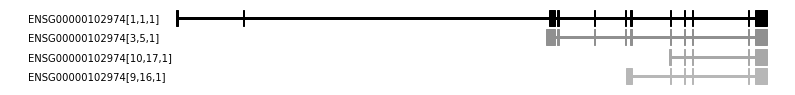

In [27]:
# CTCF, + strand gene

tids = ['ENSG00000102974[1,1,1]','ENSG00000102974[3,5,1]',
        'ENSG00000102974[10,17,1]','ENSG00000102974[9,16,1]']
sample = 'vessels'
obs_col = 'sample'

# get tpm df
# tpm_df = swan.calc_tpm(sg.adata, obs_col=obs_col).sparse.to_dense()
# tpm_df = tpm_df.transpose()
# tpm_df = tpm_df.loc[tids, sample].to_frame()
# tpm_df = tpm_df.sort_values(by=sample, ascending=False)
# tpm_df = tpm_df[sample]
# print(tpm_df)

# colormap definition
light_shade = get_sector_colors()[0]['mixed']
dark_shade = get_sector_colors()[0]['simple']
cmap = mpl.colors.LinearSegmentedColormap.from_list('', [light_shade, dark_shade])


plt.figure(1, figsize=(14, 1.5), frameon=False)
ax = plt.gca()
h = 0.1

for i, tid in enumerate(tpm_df.index.tolist()):
    
    # color by TPM
    tpm = tpm_df[tid]
    norm_val = (tpm-tpm_df.min())/(tpm_df.max()-tpm_df.min())
    color = cmap(norm_val)
    
    y = (len(tpm_df.index) - i)*(h*1.25)
    print(y)
    ax = sg.plot_browser(tid, y=y, x=14, h=h, w=56, color=color, ax=ax) 
    # ax = browser_plot(sg, tid, y=i, h=h, w=56, ax=ax)
    
    ax.text(0,y+(h/2), tid, verticalalignment='center')    
    plt.xlim((-2, 72))

plt.axis('off')



In [223]:
# tid = 'ENSG00000102974[1,1,1]'
tid = 'ENSG00000071564[1,1,1]' # fwd strand t

w = 14
h = 0.1
x = 100
y = 1
color = '#8b7af0'

In [311]:
sg.t_df.loc[sg.t_df.tid == 'ENST00000592395']

,tname,gid,gname,path,tid,tss_id,ic_id,tes_id,loc_path,annotation,novelty
tid,,,,,,,,,,,


In [328]:
def browser_plot(sg, tid, x=0, y=0, w=14, h=0.1, color=None, ax=None): 
    
    # TODO option to plot relative to gene start or not
    
    # get info for this tid
    sg.pg.init_plot_settings(sg, tid=tid,
                         indicate_dataset=False,
                         indicate_novel=False,
                         browser=True)
    
    # set up axes if not provided
    if not ax:
        plt.figure(1, figsize=(4,3), frameon=False)
        plt.xlim(x, x+w)
        plt.ylim(y-2, y+2)
        ax = plt.gca()
        
    # change color
    if not color: 
        color = sg.pg.color_dict['browser']
    
    # get min / max coords from gene and transcript
    g_min = sg.pg.g_min
    g_max = sg.pg.g_max
    t_min, t_max = sg.pg.get_transcript_min_max(sg.pg.tid)
    g_len = g_max - g_min
    t_len = t_max - t_min
    
    # scaling factor
    scale = w / g_len
    
    # path / strand info
    strand = sg.pg.strand
    print(strand)
    loc_path = sg.pg.loc_path
    edge_path = sg.pg.edge_path

    # plot exons
    exons = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][::2]
    introns = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][1::2]
    y_coord = y
    for v1,v2 in exons:

        # get coords from loc_df
        v1_coord = sg.pg.loc_df.loc[v1, 'coord']
        v2_coord = sg.pg.loc_df.loc[v2, 'coord']
        min_coord = min(v1_coord, v2_coord)
        max_coord = max(v1_coord, v2_coord)

        # depending on strand, get starting coord and witdh of exon
        if strand == '+':
            x_coord = ((min_coord-g_min)*scale)+x
        elif strand == '-':
            x_coord = ((g_max-max_coord)*scale)+x

        # width
        width = (max_coord-min_coord)*scale
        
        # debugging
        if min_coord == t_min:
            print('Min x exon coord: {}'.format(x_coord))
            print(x_coord)
        
        # plot
        rect = pch.Rectangle((x_coord, y_coord), width, h, color=color, edgecolor=None)
        ax.add_patch(rect)


    # plot intron as a line b/w first and last exons
    dist = 200*scale
    print('scale: {}'.format(scale))
    print('dist: {}'.format(dist))
    y_line = y + (h/2)
    if strand == '+':
        c1 = ((t_min-g_min)*scale)+x
        c2 = c1+(t_len*scale)-dist
        x_coords = [c1+dist, c2-dist]
    elif strand == '-':
        c1 = ((g_max-t_max)*scale)+x
        c2 = c1+(t_len*scale)
        x_coords = [c1+dist, c2-dist]

    linewidth = 3
    print(x_coords)
    plt.plot(x_coords, [y_line,y_line], color=color, linewidth=linewidth)
    print()
    
    return ax

-
Min x exon coord: 66.63548647092688
66.63548647092688
scale: 0.00128957973517559
dist: 0.257915947035118
[14.626735751295337, 69.74208405296488]

-
Min x exon coord: 66.63548647092688
66.63548647092688
scale: 0.00128957973517559
dist: 0.257915947035118
[61.72863557858376, 67.58203799654576]

-
Min x exon coord: 66.63548647092688
66.63548647092688
scale: 0.00128957973517559
dist: 0.257915947035118
[53.43405872193436, 66.650961427749]

-
Min x exon coord: 67.25448474381116
67.25448474381116
scale: 0.00128957973517559
dist: 0.257915947035118
[14.257915947035118, 67.58203799654576]



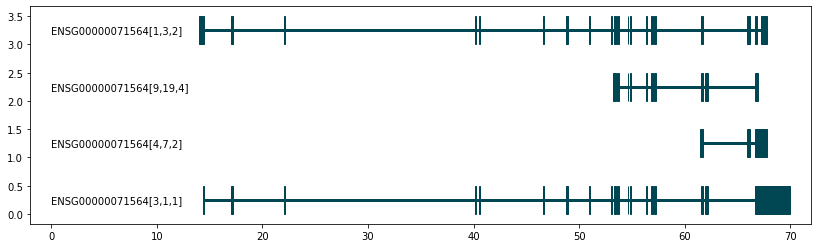

In [329]:
# TCF3, - strand gene

plt.figure(1, figsize=(14, 4), frameon=False)
ax = plt.gca()
h = 0.5
tids = ['ENSG00000071564[3,1,1]','ENSG00000071564[4,7,2]',
        'ENSG00000071564[9,19,4]','ENSG00000071564[1,3,2]']
for i, tid in enumerate(tids): 
    y = i 
    ax = browser_plot(sg, tid, y=i, x=14, h=h, w=56, ax=ax)
    # ax = browser_plot(sg, tid, y=i, h=h, w=56, ax=ax)
    
    ax.text(0,i+(h/2), tid, verticalalignment='center')    
    plt.xlim((-2, 72))

1609240
1609240
1652665
Scale: 0.0003223949337938975
t max: 1652665
t min: 1609240
g max: 1652665
g min: 1609240
g_len: 43425
t_len: 43425
w: 14
x: 100
strand: -


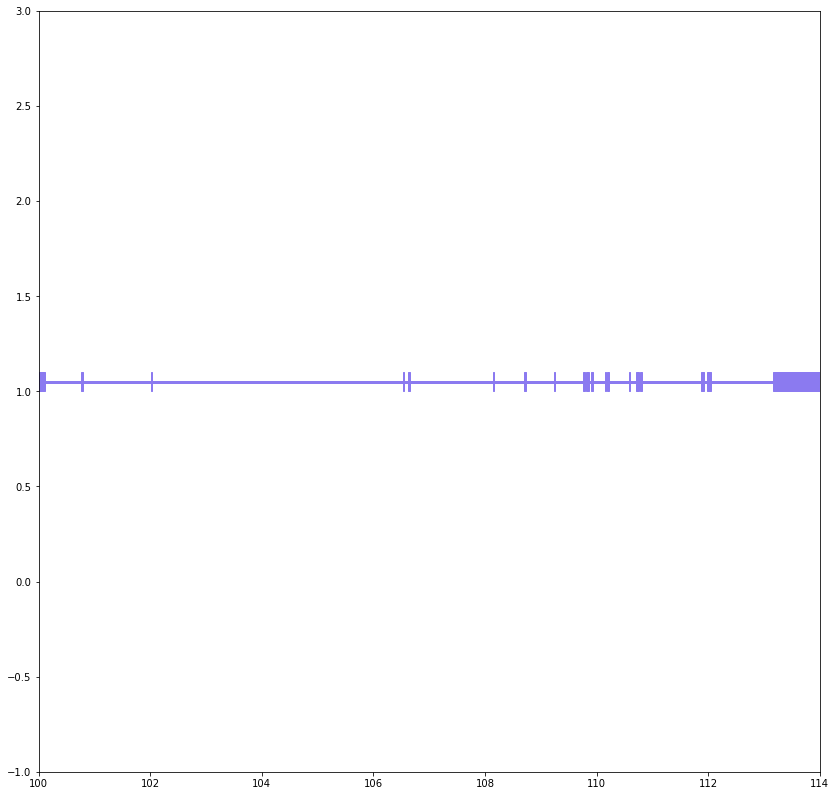

In [224]:


g_min = sg.pg.g_min
g_max = sg.pg.g_max
t_min, t_max = sg.pg.get_transcript_min_max(sg.pg.tid)
g_len = g_max - g_min
t_len = t_max - t_min
print(t_min)
print(g_min)
print(g_max)

# # testing
# g_min = 100
# g_max = 800
# # g_min = 200
# # g_max = 500
# t_min = 200
# t_max = 500
# strand = '-'
# g_len = g_max - g_min
# t_len = t_max - t_min
# w = g_len

# figure setup -- allow for passing an axis too tho!
plt.figure(1, figsize=(14,14), frameon=False)
ax = plt.gca()
plt.xlim(x, x+w)
plt.ylim(y-2, y+2)

# scaling factors
scale = w / g_len

print('Scale: {}'.format(scale))
print('t max: {}'.format(t_max))
print('t min: {}'.format(t_min))
print('g max: {}'.format(g_max))
print('g min: {}'.format(g_min))
print('g_len: {}'.format(g_len))
print('t_len: {}'.format(t_len))
print('w: {}'.format(w))
print('x: {}'.format(x))
print('strand: {}'.format(strand))


# path / strand info
strand = sg.pg.strand
loc_path = sg.pg.loc_path
edge_path = sg.pg.edge_path

# plot exons
exons = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][::2]
introns = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][1::2]

# # testing
# exons = [(200,400), (450, 500)]
# y_coord = y
for v1,v2 in exons:
    
    # reference exons in the df
    v1_coord = sg.pg.loc_df.loc[v1, 'coord']
    v2_coord = sg.pg.loc_df.loc[v2, 'coord']
    
    # # testing
    # v1_coord = v1
    # v2_coord = v2
    
    min_coord = min(v1_coord, v2_coord)
    max_coord = max(v1_coord, v2_coord)
    
    # x coord
    if strand == '+':
        x_coord = ((min_coord-g_min)*scale)+x
    elif strand == '-':
        x_coord = ((g_max-max_coord)*scale)+x
    
    # width
    width = (max_coord-min_coord)*scale
    rect = pch.Rectangle((x_coord, y_coord), width, h, color=color)
    ax.add_patch(rect)
    

# plot intron as a line
dist = 1.01*scale
y_line = y + (h/2)
if strand == '+':
    c1 = ((t_min-g_min)*scale)+x+dist
    c2 = ((t_max-g_min)*scale)-dist
    x_coords = [c1, c2]
elif strand == '-':
    c1 = ((g_max-t_max)*scale)+x
    c2 = c1+(t_len*scale)
    x_coords = [c1+dist, c2-dist]

linewidth = 3
plt.plot(x_coords, [y_line,y_line], color=color, linewidth=linewidth)

# deal with ticks later

plt.savefig('figures/test_browser.pdf')

[2.0202, 7.9798]
1.25
3


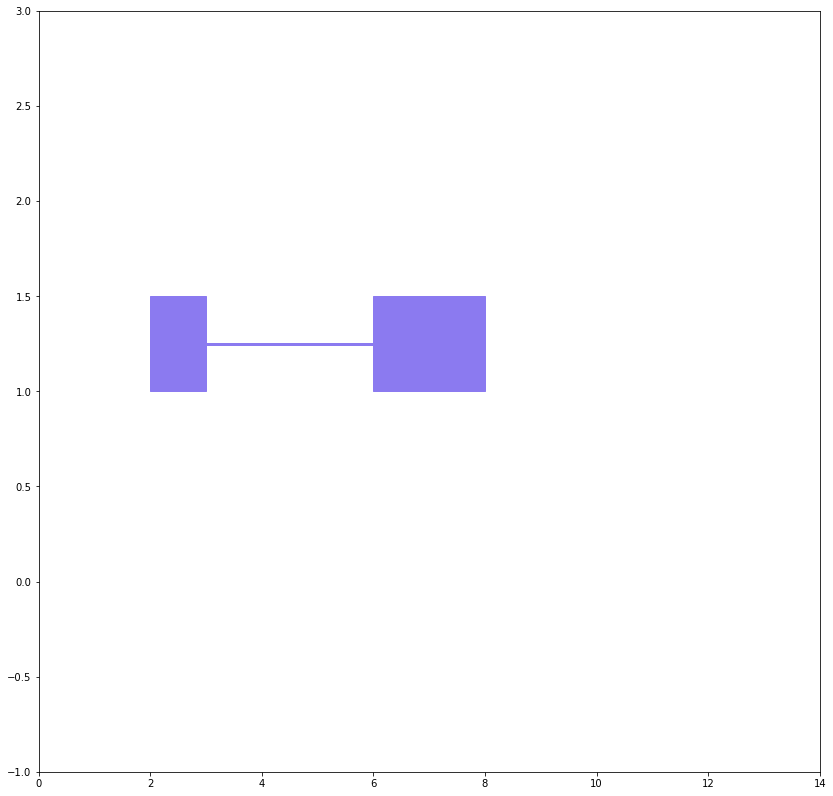

In [182]:


# g_min = sg.pg.g_min
# g_max = sg.pg.g_max
# t_min, t_max = sg.pg.get_transcript_min_max(sg.pg.tid)
# g_len = g_max - g_min
# # print(t_min)
# # print(g_min)

# testing
g_min = 100
g_max = 800
t_min = 200
t_max = 500
g_len = g_max - g_min

# figure setup -- allow for passing an axis too tho!
plt.figure(1, figsize=(14,14), frameon=False)
ax = plt.gca()
plt.xlim(x, x+w)
plt.ylim(y-2, y+2)

# scaling factors
scale = w / g_len

# path / strand info
strand = sg.pg.strand
loc_path = sg.pg.loc_path
edge_path = sg.pg.edge_path

# plot exons
exons = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][::2]
introns = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][1::2]

# testing
exons = [(200,250), (400, 500)]
introns = [(251,399)]

y_coord = y
for v1,v2 in exons:
    
    # # reference exons in the df
    # v1_coord = sg.pg.loc_df.loc[v1, 'coord']
    # v2_coord = sg.pg.loc_df.loc[v2, 'coord']
    
    # testing
    v1_coord = v1
    v2_coord = v2
    
    # x coord
    x_coord = ((v1_coord-g_min)*scale)+x
    
    # width
    width = (v2_coord - v1_coord)*scale
    rect = pch.Rectangle((x_coord, y_coord), width, h, color=color)
    ax.add_patch(rect)
    

# plot intron as a line
dist = 1.01*scale
y_line = y + (h/2)
x_coords = [((t_min-g_min)*scale)+x+dist, ((t_max-g_min)*scale)-dist]
# linewidth = scale*(3/0.02)
linewidth = 3
print(x_coords)
print(y_line)
print(linewidth)
plt.plot(x_coords, [y_line,y_line], color=color, linewidth=linewidth)

# deal with ticks later

plt.savefig('figures/test_browser.pdf')

67562417
307
67571148
116
67610824
789
67611951
170
67616745
133
67620697
120
67621442
149
67626555
160
67628370
182
67629398
135
67636690
161
67637688
1539


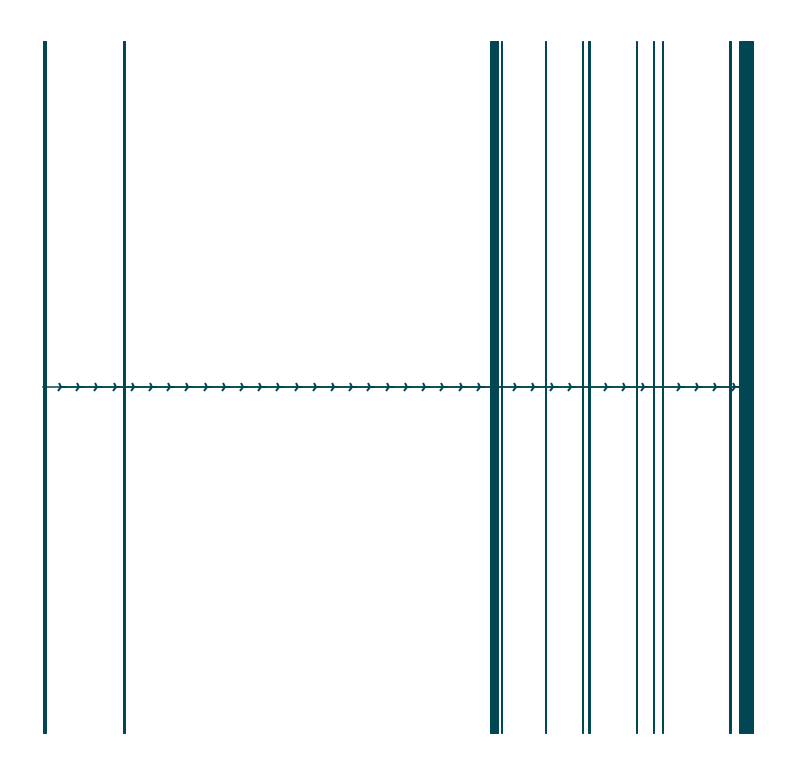

In [30]:


g_min = sg.pg.g_min
g_max = sg.pg.g_max
t_min, t_max = sg.pg.get_transcript_min_max(sg.pg.tid)
g_len = g_max - g_min

x_min = int(g_min-(6/(g_max-g_min)))
x_max = int(g_max+(6/(g_max-g_min)))

strand = sg.pg.strand
loc_path = sg.pg.loc_path
edge_path = sg.pg.edge_path

# plotting init
# plt.figure(1, figsize=(14,2.8), frameon=False)
# plt.xlim(g_min, g_max)
# plt.ylim(-1.05, 1.05)
ax = plt.gca()
color = sg.pg.color_dict['browser']

# plot each exon as a rectangle
y_coord = -0.1
height = 0.2
exons = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][::2]
introns = [(v1,v2) for v1,v2 in zip(loc_path[:-1],loc_path[1:])][1::2]
for v1,v2 in exons:
    x_coord = sg.pg.loc_df.loc[v1, 'coord']
    width = sg.pg.loc_df.loc[v2, 'coord'] - x_coord
    print(x_coord)
    print(width)
    rect = pch.Rectangle((x_coord,y_coord), width, height, color=color)
    ax.add_patch(rect)

# plot each intron as a line
dist = 0.001*g_len
plt.plot([t_min+dist, t_max-dist], [0,0], color=color)

# reverse plot if we're on the minus strand
if strand == '-':
    plt.gca().invert_xaxis()

# remove axis
plt.axis('off')

def get_tick_coords(loc_df, gene_len, exons, g_min, g_max, strand):

    tick_coords = list(np.linspace(g_min, g_max, 40))

    # remove ticks that are before the start of the first exon
    start = loc_df.loc[exons[0][1], 'coord']
    if strand == '+':
        tick_coords = [t for t in tick_coords if t > start]
    else:
        tick_coords = [t for t in tick_coords if t < start]

    # remove ticks that are after the end of the last exon
    stop = loc_df.loc[exons[-1][1], 'coord']
    if strand == '+':
        tick_coords = [t for t in tick_coords if t < stop]
    else:
        tick_coords = [t for t in tick_coords if t > stop]

    # remove ticks in and around the area of plotted exons
    dist = 0.001*gene_len
    for v1,v2 in exons:
        start = loc_df.loc[v1, 'coord']
        stop = loc_df.loc[v2, 'coord']
        tick_coords = [t for t in tick_coords
                       if t < start-dist or t > stop+dist]

    # if we only have one intron, and nothing made the cut, just stick
    # a tick in the middle of the intron
    if len(exons) == 2 and not tick_coords:
        tick_coords = [(loc_df.loc[exons[0][1],'coord']+loc_df.loc[exons[1][0],'coord'])/2]

    return tick_coords

# get coordinates for evenly-spaced ticks indicating strandedness
# ala genome browser
tick_coords = get_tick_coords(sg.pg.loc_df, g_len, exons,
    g_min, g_max, sg.pg.strand)
plt.plot(tick_coords, [0 for i in range(len(tick_coords))],
    color=color, marker='4', ms=10, mew=2)

## old


In [17]:
sg = swan.read('swan.p')

Read in graph from swan.p


In [ ]:
df = swan.calc_total_counts(sg.tss_adata, obs_col='sample', layer='counts').sparse.to_dense()

In [18]:
df = swan.calc_tpm(sg.tss_adata, obs_col='sample').sparse.to_dense()

In [19]:
df.head()

,ENCODEHG000058784_1,ENCODEHG000058784_2,ENCODEHG000058837_1,ENCODEHG000058837_2,ENCODEHG000058844_1,ENCODEHG000058844_2,ENCODEHG000058846_1,ENCODEHG000058850_1,ENCODEHG000058853_1,ENCODEHG000058854_1,...,ENSG00000285972_2,ENSG00000285976_1,ENSG00000285976_2,ENSG00000285978_1,ENSG00000285980_2,ENSG00000285988_1,ENSG00000285988_2,ENSG00000285988_3,ENSG00000285988_4,ENSG00000285991_1
hl60_m2_24hr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,13.540341,9.701882,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
colon,0.460419,0.460419,35.236786,10.420664,15.581833,2.762515,17.375229,7.827126,11.874339,117.750137,...,0.0,254.145233,223.153107,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
hl60,0.000000,3.055013,6.869515,2.231703,2.593668,0.000000,0.000000,0.498857,1.271501,10.286493,...,0.0,74.978142,64.740364,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
vessels,1.568427,6.538075,114.083252,16.774925,29.967066,1.253958,19.270973,8.823140,12.115827,236.000916,...,0.0,42.929932,59.074059,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
brain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,14.066960,16.906832,0.070702,0.080707,0.0,0.0,0.0,0.0,0.080707


In [20]:
df = swan.calc_tpm(sg.tes_adata, obs_col='sample').sparse.to_dense()

In [21]:
df.head()

,ENCODEHG000058784_1,ENCODEHG000058784_2,ENCODEHG000058837_1,ENCODEHG000058844_1,ENCODEHG000058844_2,ENCODEHG000058844_3,ENCODEHG000058844_4,ENCODEHG000058846_1,ENCODEHG000058850_1,ENCODEHG000058853_1,...,ENSG00000285976_4,ENSG00000285978_1,ENSG00000285980_2,ENSG00000285988_1,ENSG00000285988_2,ENSG00000285991_4,ENSG00000285991_5,ENSG00000285991_6,ENSG00000285991_7,ENSG00000285991_8
hl60_m2_24hr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
colon,0.460419,0.460419,45.657448,2.762515,0.000000,7.827126,7.754707,17.375229,7.827126,1.745118,...,0.896699,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
hl60,3.055013,0.000000,9.101218,0.000000,0.000000,0.673262,1.920406,0.000000,0.498857,1.271501,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
vessels,6.538075,1.568427,130.858185,1.253958,4.025308,18.067204,7.874555,19.270973,8.823140,12.115827,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
brain,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.089794,0.070702,0.080707,0.0,0.0,0.080707,0.0,0.0,0.0,0.0
